<a href="https://colab.research.google.com/github/hiteshsahu1221/EDA-using-python/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name  - Play Store App Review Analysis**
* Project Type - Exploratory Data Analysis(EDA)
* Data Insights by -  Hitesh Sahu


# **Project Summary -**
This is an Exploratory Data Analysis (EDA) project focusing on Play Store App Review datasets. The first dataset contains information about apps, including details such as app category, rating, size, and more. It comprises 10,841 rows and 13 columns. The second dataset consists of customer reviews for Android apps, with 37,427 rows and 8 columns.

The primary objective of this project is to conduct exploratory data analysis on both datasets. This involves understanding the data, cleaning it by handling duplicate and null values, and modifying necessary data types for visualization purposes.

The data cleaning process includes identifying and removing duplicate entries as well as handling null values appropriately. After cleaning the data, necessary variables are converted to the appropriate data types to facilitate visualization.

Subsequently, data visualization techniques are applied to gain insights and observe patterns within the datasets. Visualizations help in understanding the distribution of various features and relationships between them.

Furthermore, sentiment analysis is performed on the second dataset containing customer reviews. This analysis aims to extract sentiment-related information from the text data, providing insights into the overall sentiment of the reviews.

Overall, the project aims to provide a comprehensive analysis of Play Store App Review datasets through exploratory data analysis and sentiment analysis techniques.

# **Problem Statement**
The Play Store App Review dataset presents an opportunity to gain valuable insights into user preferences, app engagement, and sentiment analysis. With two datasets available, one containing app details and the other comprising customer reviews, the objective is to perform a comprehensive analysis to address the following key questions:

* Data Understanding.
* Data Cleaning and Preparation.
* Exploratory Data Analysis (EDA)
* Sentiment Analysis

#**Let's Begin !**

# Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import date
import datetime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [ ]:
path = "/content/drive/MyDrive/almabetter/caption project/play store app review anlysis/Play Store Data.csv"
path2 = "/content/drive/MyDrive/almabetter/caption project/play store app review anlysis/User Reviews.csv"
df1 = pd.read_csv(path)
df2 = pd.read_csv(path2)

* There are two datasets: one contains data about various categories of apps and their ratings on the Play Store, while the other dataset contains reviews of different apps.








In [ ]:
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df2.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* In the first data set, there are 10,841 rows and 13 columns. These 13 variables have data types of both object and float.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


* In the second data set, there are 37427 rows and 8 columns. These 8 variables have data types of both object and float.

# **Clean Data**

# check duplicates

In [ ]:
print("First data set duplicate values ",df1.duplicated().sum())
print("Second data set duplicate values ", df2.duplicated().sum())

First data set duplicate values  483
Second data set duplicate values  33616


* First data file has 483 duplicate entries.
* Second data file have 33616 duplicate entries

# Handel duplicate values

In [ ]:
df1.drop_duplicates(inplace = True)
df2.drop_duplicates(inplace = True)
print("First data set duplicate values "  ,df1.duplicated().sum())
print("Second data set duplicate values after handel duplicate values ",df1.duplicated().sum())

First data set duplicate values  0
Second data set duplicate values after handel duplicate values  0


# Check Null Values

In [ ]:
df1.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

* In the first dataset, the "Rating" variable has 1,474  missing values,The "Content Rating" variable has 1 missing values and  "Current ver" variable has 8  missing values, and the "Android ver " variable has 3 missing values.








In [ ]:
df2.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

* In the Second dataset, the "Translated_Review" variable has 987 missing values,The "sentiment" variable has 982 missing values and "Sentiment_Polarity" variable has 982 missing values, and the "Sentiment_subjectivity " variable has 982 missing values.

# Handel null values for First data set

# Mean imputation

In [ ]:
df1["Rating"].fillna(df1["Rating"].mean(),inplace = True)
df1.dropna(inplace = True)
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

* I performed mean imputation on the null values in the "rating" variable as it had a higher count of null values, and I dropped the rest.

# Handel null values for second data set

In [ ]:
df2.dropna(inplace =True )
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

* In the second dataset, we dropped rows with null values because the reviews are provided by users, and we cannot perform imputation on them.

# Change data types

In [ ]:
def num(x):
  a = re.sub(r"[^\d]",'',str(x))
  return a
df1["Installs"]= df1["Installs"].apply(num)
df1["Price"] = df1["Price"].apply(num)
df1["Reviews"]= df1["Reviews"].apply(num)
df1["Installs"] = pd.to_numeric(df1["Installs"])
df1["Reviews"] = pd.to_numeric(df1["Reviews"])
df1["Price"] = pd.to_numeric(df1["Price"])



* I used the re.sub() function to convert the "install","Reviews" and "price" variables from object data type to numeric data type by extracting digits.

# **Data visulization**

# **Different category app  availble in play store**

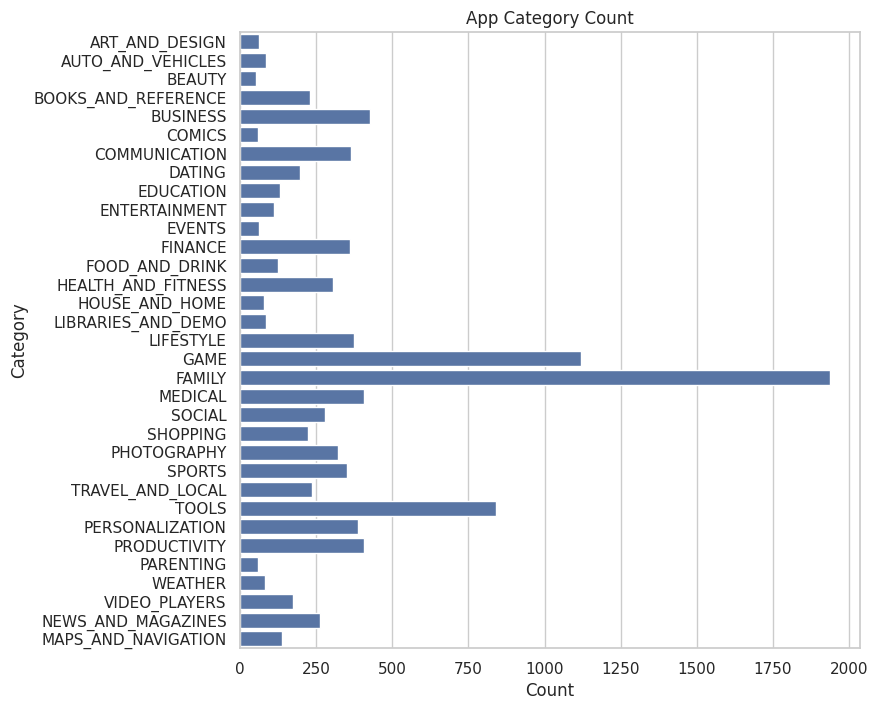

In [ ]:

plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.countplot(data = df1 , y = df1["Category"])
plt.ylabel("Category")
plt.xlabel("Count")
plt.title('App Category Count')
plt.show()

# Observation

*  In the Google Play Store, there are a total of 33 app categories available, and the number of apps currently listed is 10,829.

*   The "Family" category in the Google Play Store has a higher number of apps compared to any other category, with a total of 1,968 apps available.

*  The "Beauty" category has the fewest number of apps, with a total of only 53 apps available.





# **Average Rating for ech category**

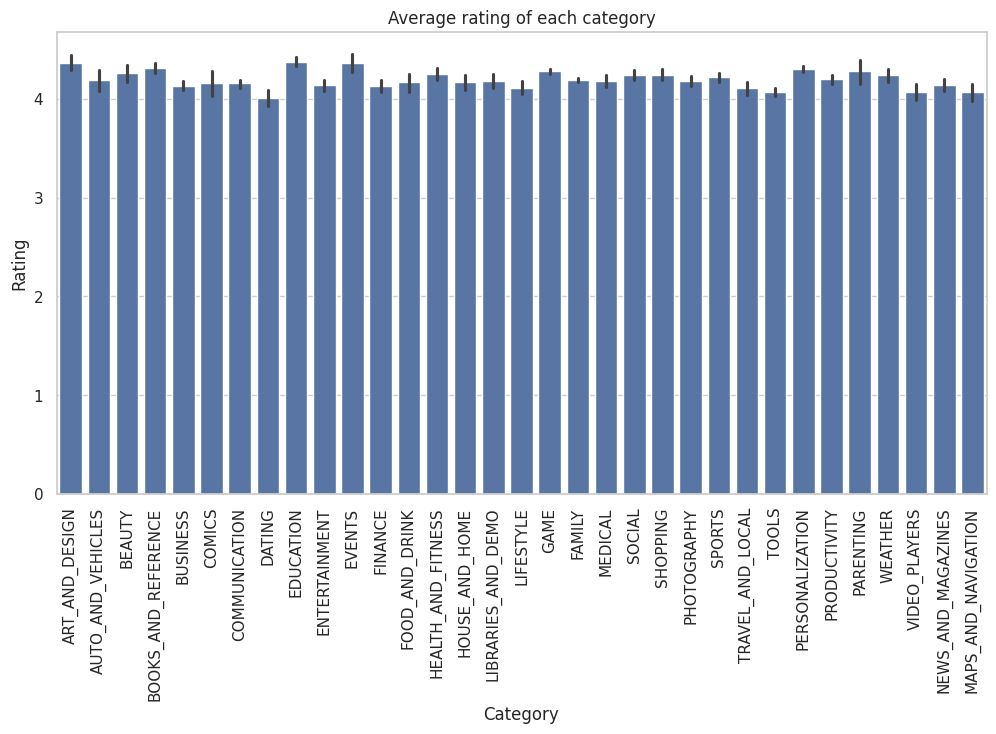

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = df1, x = df1["Category"],y= df1["Rating"])
plt.xticks(rotation = 90)
plt.title("Average rating of each category")
plt.show()


In [ ]:
print("Avrage rating of each category \n \n",df1.groupby("Category")["Rating"].mean())

Avrage rating of each category 
 
 Category
ART_AND_DESIGN         4.368260
AUTO_AND_VEHICLES      4.190288
BEAUTY                 4.260094
BOOKS_AND_REFERENCE    4.311599
BUSINESS               4.134562
COMICS                 4.156318
COMMUNICATION          4.157604
DATING                 4.012822
EDUCATION              4.374535
ENTERTAINMENT          4.136036
EVENTS                 4.362520
FAMILY                 4.191067
FINANCE                4.134862
FOOD_AND_DRINK         4.167837
GAME                   4.277438
HEALTH_AND_FITNESS     4.251111
HOUSE_AND_HOME         4.168431
LIBRARIES_AND_DEMO     4.182034
LIFESTYLE              4.113107
MAPS_AND_NAVIGATION    4.064701
MEDICAL                4.184293
NEWS_AND_MAGAZINES     4.140065
PARENTING              4.281590
PERSONALIZATION        4.304104
PHOTOGRAPHY            4.183266
PRODUCTIVITY           4.199599
SHOPPING               4.245401
SOCIAL                 4.246513
SPORTS                 4.218576
TOOLS                  4.065

# Observation
*  The categories of "Art & Design," "Events," and "Education" have little bit higher ratings compared to other categories in the Google Play Store.
* All categories in the Google Play Store have received positive ratings from users.


# **The distribution of ratings varies across different Type ( Free or Paid )**

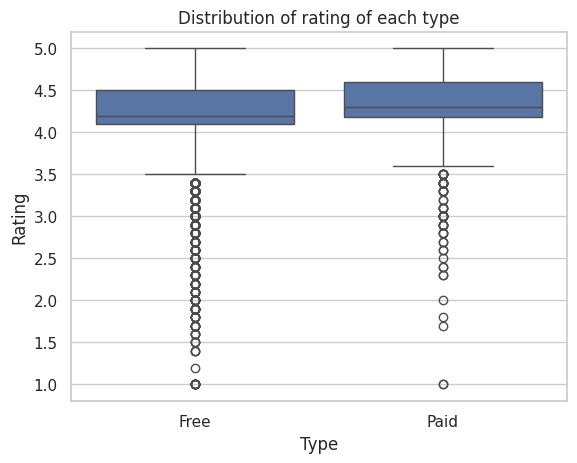

In [ ]:
sns.boxplot(y = df1["Rating"],x = df1["Type"])
plt.title("Distribution of rating of each type")
plt.show()

In [ ]:
df1.groupby("Type")["Rating"].count()

Type
Free    9584
Paid     762
Name: Rating, dtype: int64

# Outliers

In [ ]:
df = df1[["Rating","Type"]]
a = df.loc[df.loc[:,"Type"]=="Free"]
b = df.loc[df.loc[: , "Type"]=="Paid"]
def outlier(x):
  q1 = np.percentile(x,25)
  q3 = np.percentile(x,75)
  iqr = q3-q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr
  outliers = [a for a in x if a < lower or a > upper]
  return len(outliers)
print("Free app outlier count is : ",outlier(a["Rating"]))
print("Paid app outlier count is  : ",outlier(b["Rating"]))

Free app outlier count is :  671
Paid app outlier count is  :  61


# **Observation**
* In the Google Play Store, among the free and paid app types, the box plot analysis reveals interesting patterns. The free app type exhibits the highest number of ratings within its first quartile (Q1), indicating a larger number of highly rated apps. On the other hand, the paid app type also demonstrates a relatively high number of ratings within its Q1 quartile
* the free app type has a higher number of ratings in its fourth quartile (Q4) compared to the paid app type. This indicates that there is a greater number of highly-rated apps among the free apps, suggesting a higher level of popularity and user satisfaction in the free category.
*  the paid app type has a lower number of outliers compared to the free app type. suggest a free type have a also higher number of low rating as compare paid type


# **Average rating of  diffrent content**

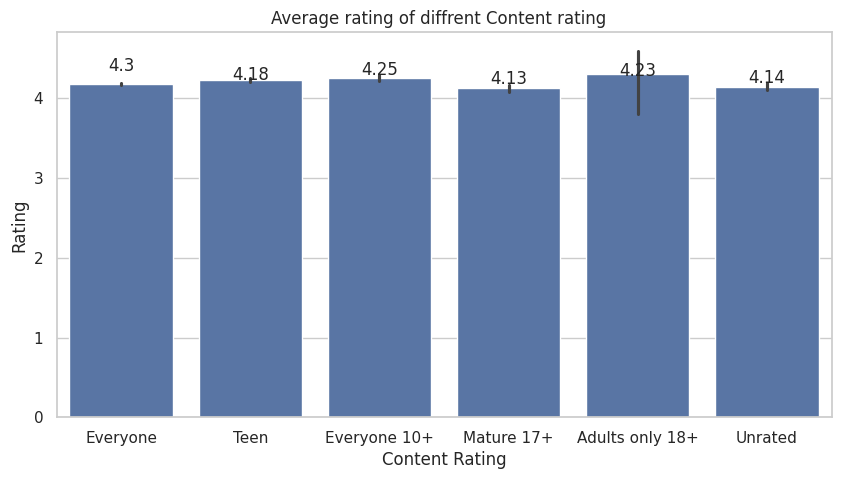

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(data = df1,x = "Content Rating",y = "Rating",estimator="mean")
lis = df1.groupby("Content Rating")["Rating"].mean()
lis = round(lis,2)
for i, v in enumerate(lis):
  ax.text(i, v, str(v), ha='center', va='bottom')
plt.title("Average rating of diffrent Content rating  ")
plt.show()

In [ ]:
df1.groupby("Content Rating")["Rating"].mean()

Content Rating
Adults only 18+    4.300000
Everyone           4.187489
Everyone 10+       4.254706
Mature 17+         4.128751
Teen               4.229366
Unrated            4.146669
Name: Rating, dtype: float64

# Obsevatoion
* In content rating "Everyone" have little bit higher average rating than other
* Every content rating have positive rating that show every content of app are frequencly used  by user

# Total Number of Review of each Category

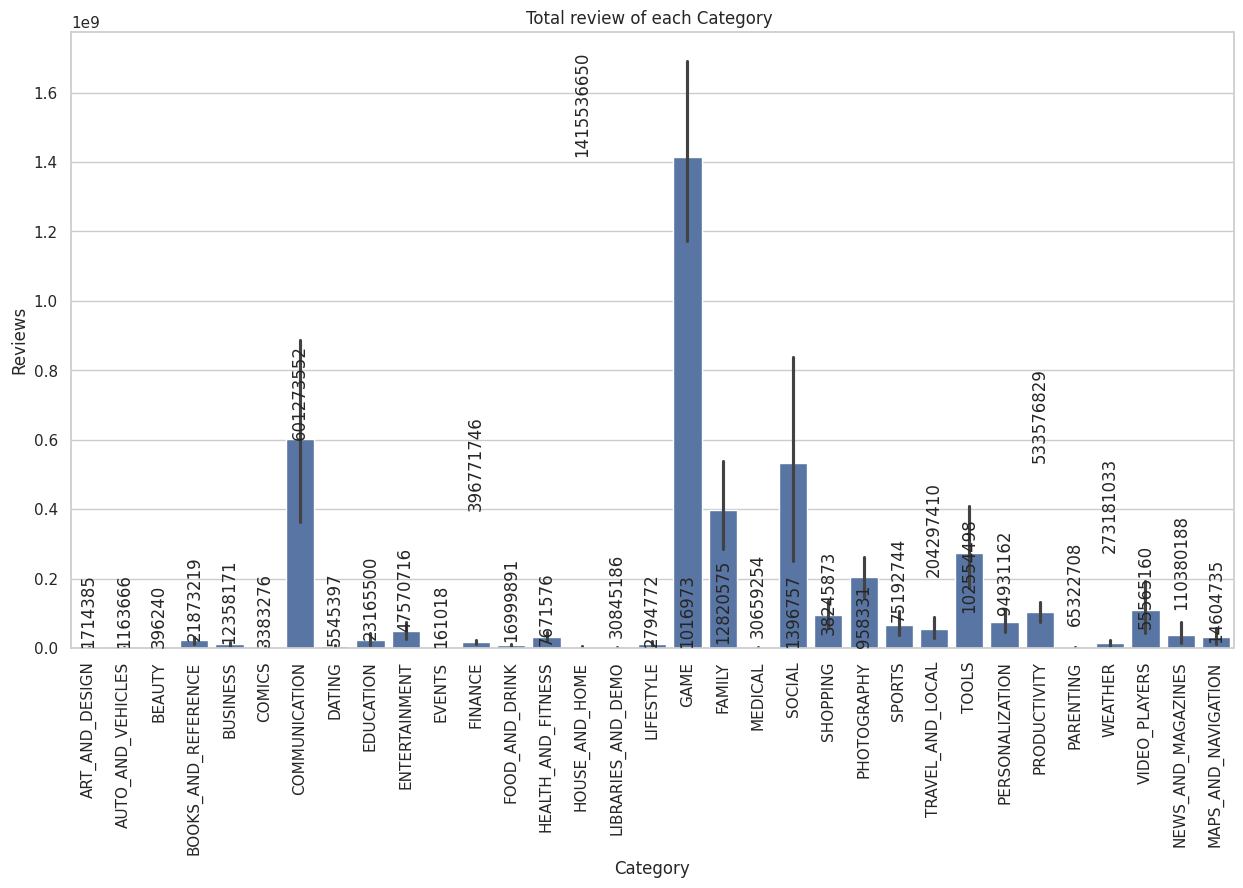

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data = df1,x = "Category", y = "Reviews",estimator="sum")
lis = df1.groupby("Category")["Reviews"].sum()
lis = round(lis,2)
for i, v in enumerate(lis):
  ax.text(i, v, str(v), ha='center', va='bottom',rotation = "vertical")
plt.title("Total review of each Category ")
plt.xticks(rotation = 90)
plt.show()



#**Google Play Store Sentiment Analysis**

# View Second data set

In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')
from itertools import count
from nltk.util import pr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df2["Translated_Review"]]
df2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df2["Translated_Review"]]
df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df2["Translated_Review"]]
print(df2.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0  Positive                1.00                0.533333     0.534       0.0   
1  Positive                0.25                0.288462     0.519       0.0   
3  Positive                0.40                0.875000     0.451       0.0   
4  Positive                1.00                0.300000     0.677       0.0   
5  Positive                1.00                0.300000     0.808       0.0   

   Neutral  
0    0.466  
1    0.481  
3    0.549 

# Ovserbatiton
* We are utilizing the SentimentIntensityAnalyzer() function to determine positive, negative, and neutral sentiment values.








In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
 5   Positive                29692 non-null  float64
 6   Negative                29692 non-null  float64
 7   Neutral                 29692 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


# **Visualize Google Play Store reviews sentiment.**

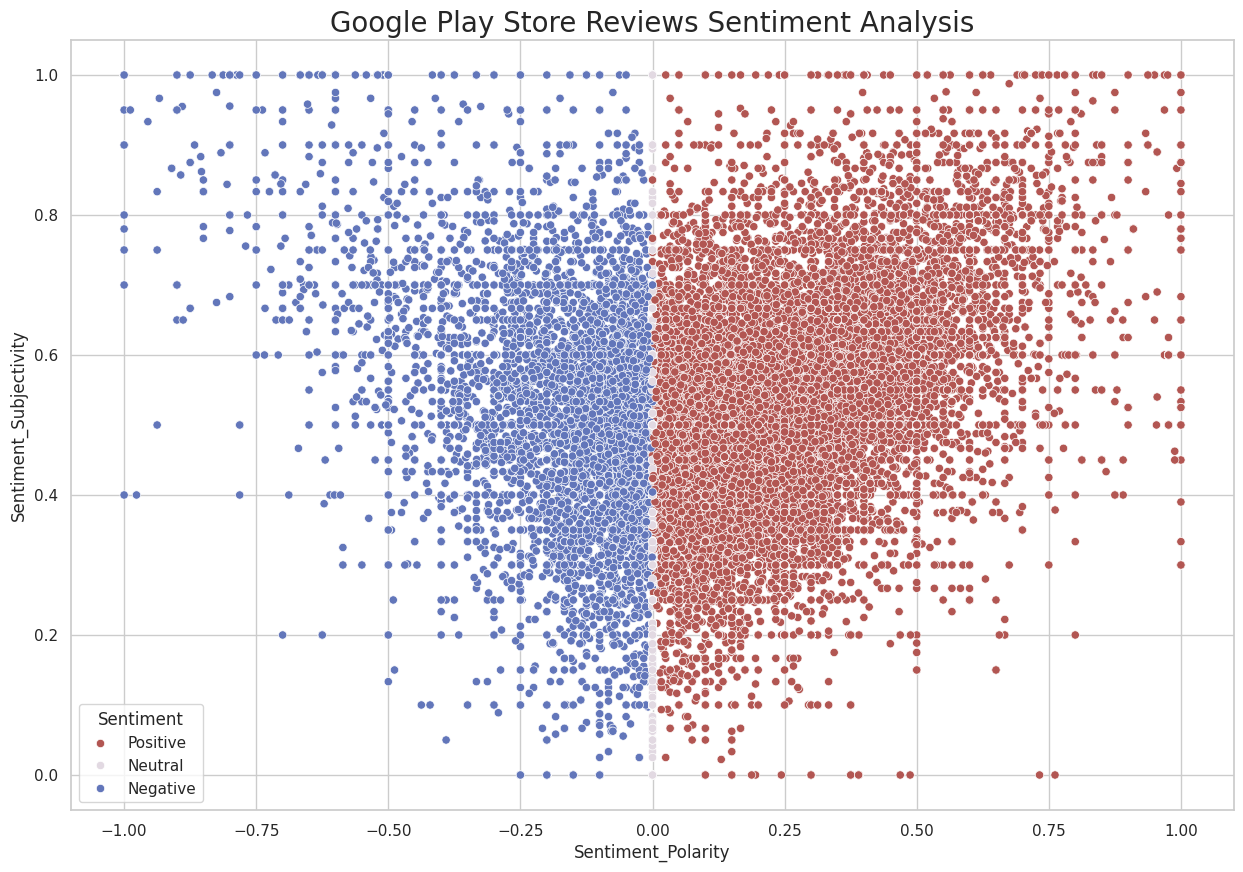

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(x = df2['Sentiment_Polarity'], y = df2['Sentiment_Subjectivity'],
                hue = df2['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

# Observation
* The sentiment polarity variable's value defines whether the review is positive, negative, or neutral. If the value is negative, the review is negative; if it is 0, the review is considered neutral; and if the value is positive, the review is positive.








# Heat map

<ipython-input-168-22d4441ed77d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df2.corr(),center=0,annot = True, cmap="Blues")


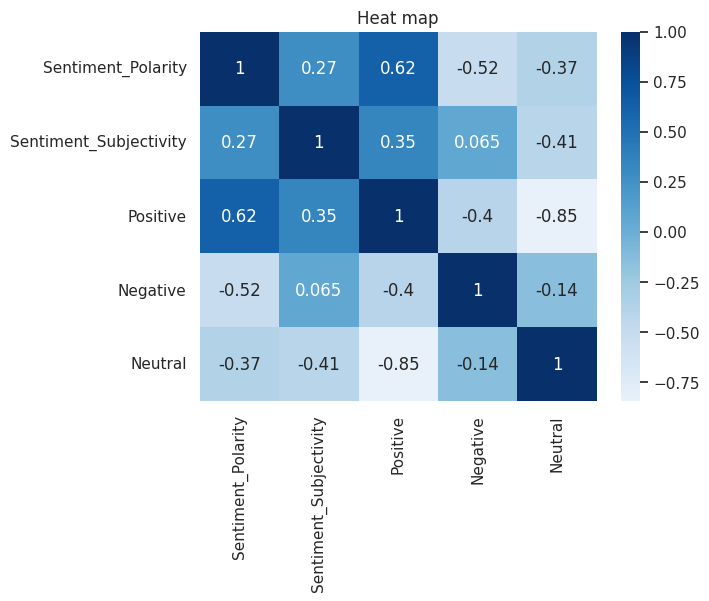

In [ ]:
sns.heatmap(data = df2.corr(),center=0,annot = True, cmap="Blues")
plt.title("Heat map")
plt.show()

# Observation
* A heat map illustrates the correlation between variables. The values on the heat map indicate the degree of correlation between variables. When the value is close to 1, it indicates a strong positive correlation between the variables, suggesting they are highly correlated. Conversely, when the value is close to 0, it suggests that the variables are not correlated with each other.








# Pair plot

<Figure size 1200x1000 with 0 Axes>

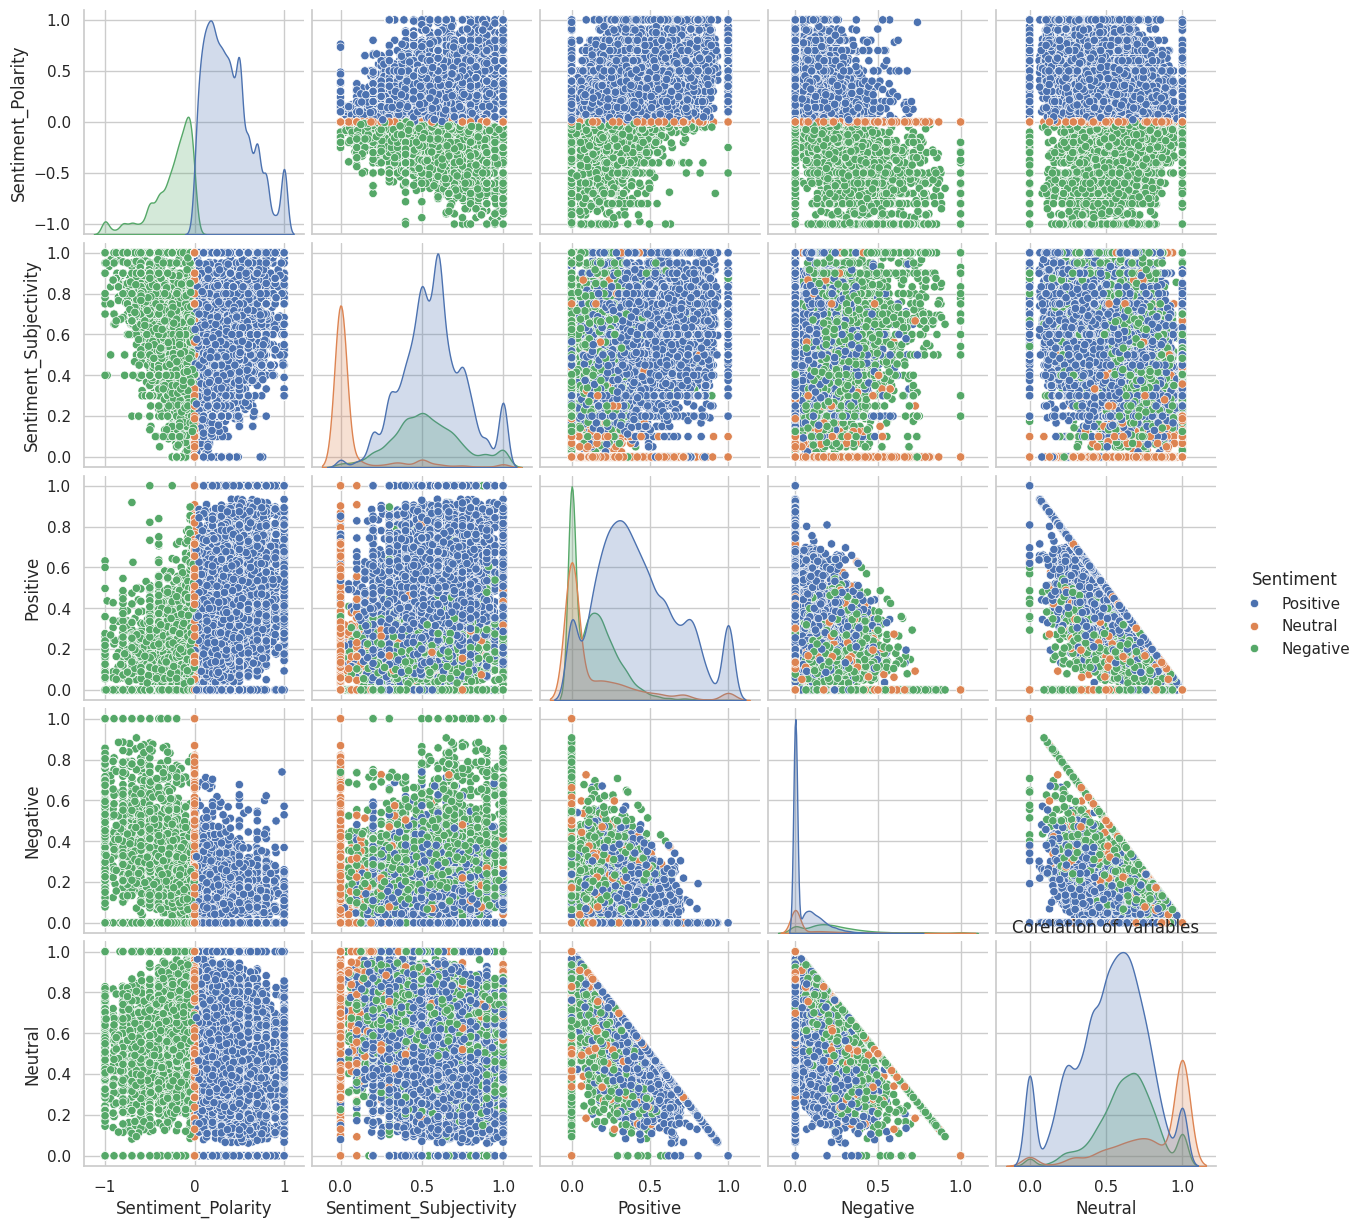

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(df2, hue ='Sentiment')
plt.title("Corelation of variables")
plt.show()

# Top 10 apps with the highest positive ratings on the Play Store.










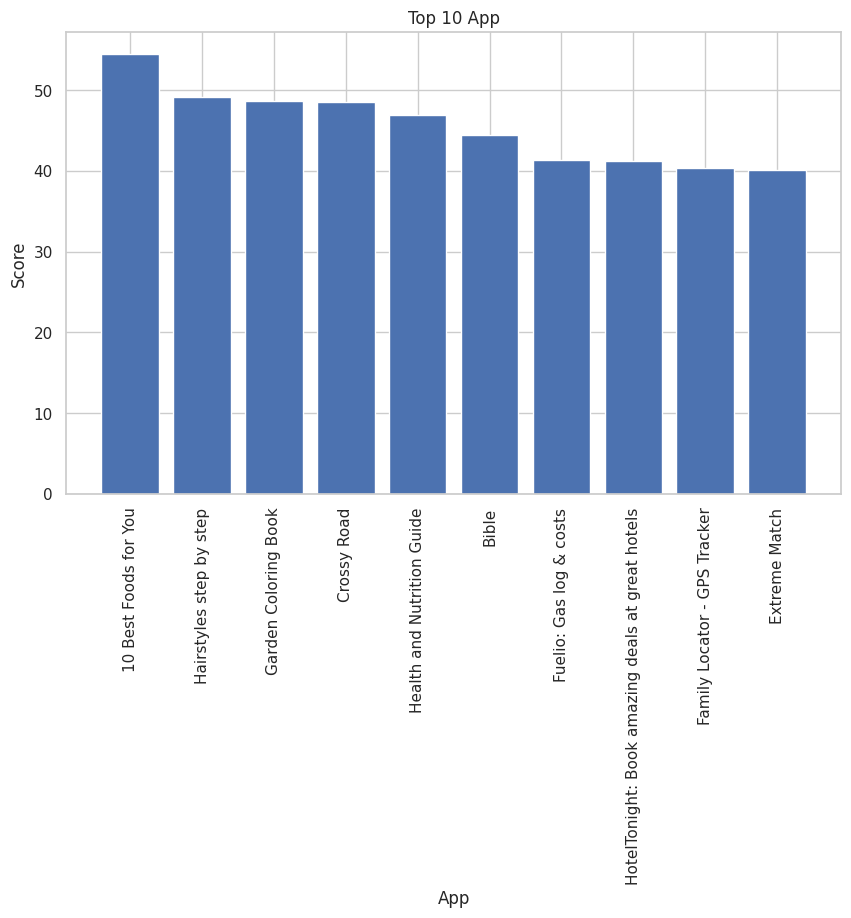

In [ ]:
d = df2.groupby("App")[["Positive","Neutral","Negative"]].sum().reset_index()
sorted_df = d.sort_values(by='Positive', ascending=False)
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10['App'], top_10['Positive'])
plt.xlabel('App')
plt.ylabel('Score')
plt.title('Top 10 App')
plt.xticks(rotation=90)
plt.show()

# Top 10 apps with the Neutral ratings on the Play Store.




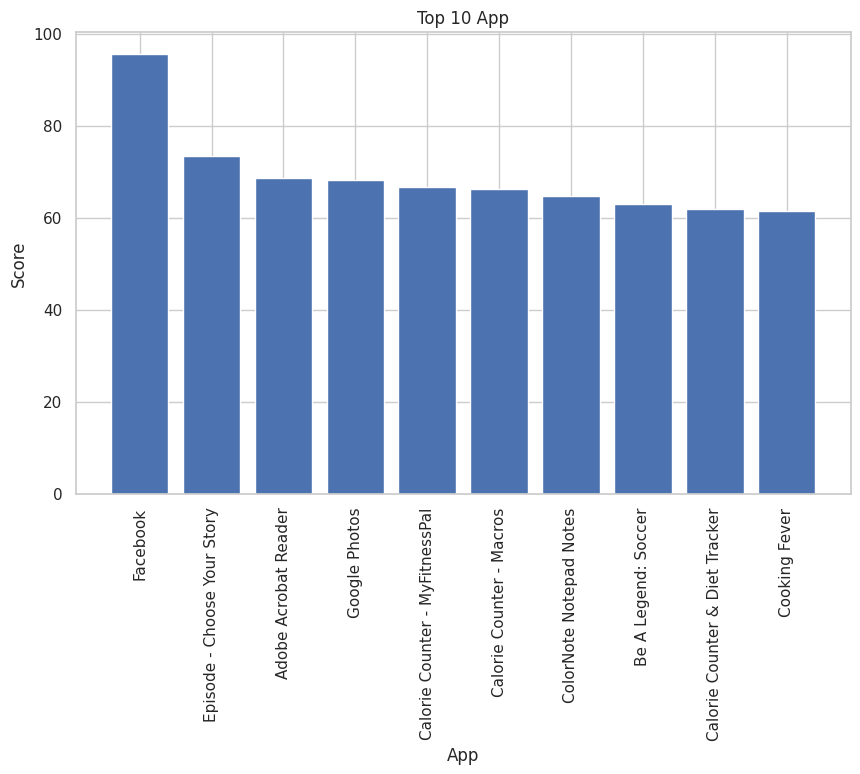

In [ ]:
sorted_df = d.sort_values(by='Neutral', ascending=False)
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10['App'], top_10['Neutral'])
plt.xlabel('App')
plt.ylabel('Score')
plt.title('Top 10 App')
plt.xticks(rotation=90)
plt.show()

# Top 10 apps with the negative ratings on the Play Store.

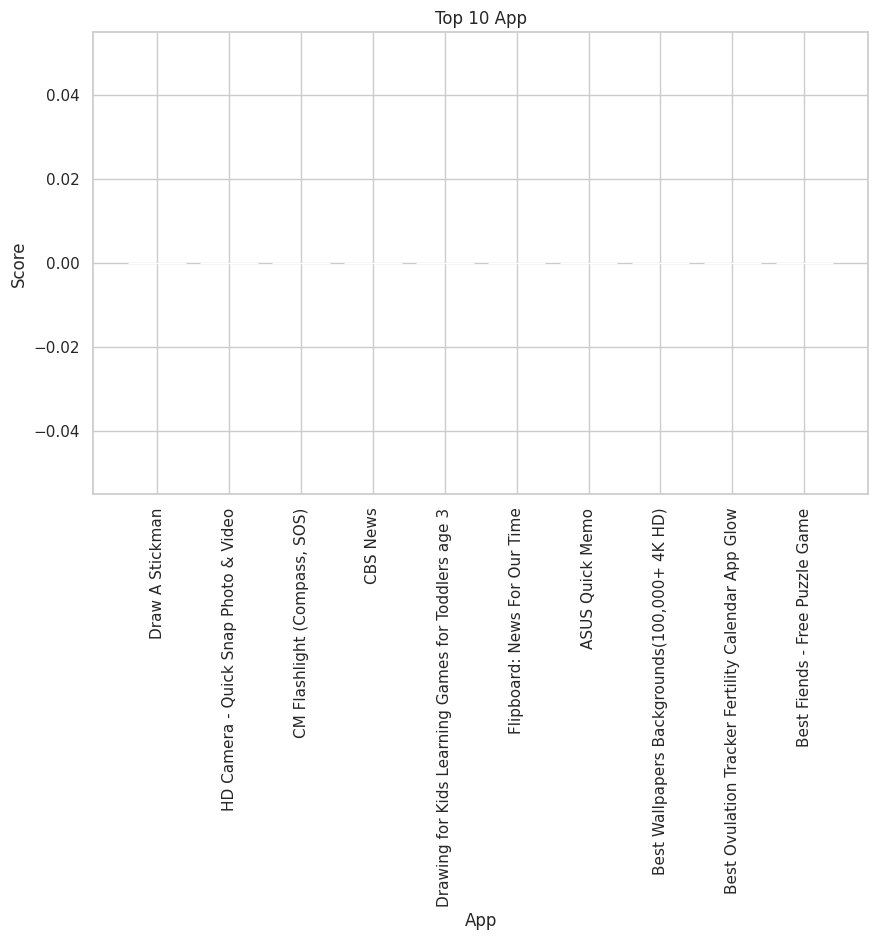

In [ ]:
sorted_df = d.sort_values(by='Negative', ascending=True)
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10['App'], top_10['Negative'])
plt.xlabel('App')
plt.ylabel('Score')
plt.title('Top 10 App')
plt.xticks(rotation=90)
plt.show()

#**Conclusion**

In conclusion, the exploratory data analysis (EDA) project on the Play Store App Review datasets has provided valuable insights into app engagement, user preferences, and sentiment analysis. Through thorough data exploration, cleaning, and analysis, several key findings have been uncovered:
* he distribution of app ratings, sizes, categories, and other attributes has been explored, revealing trends and patterns within the dataset.
* Sentiment analysis of customer reviews has provided valuable insights into user sentiments and opinions regarding various apps.